# 本地文件

**本地文件** 是支持 POSIX 协议通过文件路径访问的文件，包括但不限于：

- 本机存储系统中的文件
- 共享存储系统中的文件，例如超算平台的存储系统
- 网络挂载存储中的文件，例如挂载的二级存储

cedarkit 工具套件中数据准备工具库 reki 支持从文件系统中加载要素场。

本节介绍 reki 库基本使用方法，随后几个章节介绍其他支持加载 GRIB2 要素场的工具库如何与 cedarkit-maps 对接，包括：

- pygrib: https://github.com/jswhit/pygrib
- cfgrib: https://github.com/ecmwf/cfgrib
- earthkit-data: https://github.com/ecmwf/earthkit-data
- iris: https://github.com/SciTools/iris (暂时有问题，无法正常加载GRIB文件)

## reki

reki 库的 `reki.data_finder` 模块包含本地文件查找函数 `find_local_file`，可以使用内置的配置文件查找 CMA 超算平台中的 CEMC 业务系统数据产品。

reki 库的 `reki.format.grib` 模块包含要素加载函数 `load_field_from_file`，支持从本地文件中加载一个要素场。

导入需要的包

In [4]:
import xarray as xr
import pandas as pd
from reki.data_finder import find_local_file
from reki.format.grib import load_field_from_file

设置绘图的数据参数，使用 CMA-GEPS 2024 年 4 月 1 日 00 时次 024 时效集合成员 1 的数据。

In [2]:
system_name = "CMA-GEPS"
data_type = "cma_geps/grib2/orig"
start_time = pd.to_datetime("2024-04-01 00:00:00")
forecast_time = pd.to_timedelta("24h")
number = 1

### 加载数据

查找 GRIB2 数据文件的路径

In [7]:
file_path = find_local_file(
    data_type,
    start_time=start_time,
    forecast_time=forecast_time,
    number=1,
)
file_path

PosixPath('/g3/COMMONDATA/OPER/CEMC/GEPS/Prod-grib/2024040100/grib2/gef.gra.001.2024040100024.grb2')

加载 2 米温度要素场。

In [5]:
t_2m_field = load_field_from_file(
    file_path,
    parameter="2t",  
) - 273.15
t_2m_field

<xarray.DataArray '2t' (latitude: 360, longitude: 720)> Size: 2MB
array([[-27.13763672, -23.05763672, -23.02763672, ..., -23.07763672,
        -23.04763672, -23.01763672],
       [-25.99763672, -22.87763672, -22.89763672, ..., -22.90763672,
        -22.88763672, -22.87763672],
       [-26.66763672, -22.93763672, -23.02763672, ..., -22.99763672,
        -22.98763672, -22.97763672],
       ...,
       [-45.65763672, -45.31763672, -45.74763672, ..., -45.70763672,
        -45.76763672, -46.06763672],
       [-45.68763672, -45.85763672, -45.95763672, ..., -46.42763672,
        -45.62763672, -45.88763672],
       [-45.27763672, -46.06763672, -45.97763672, ..., -45.56763672,
        -45.53763672, -46.02763672]])
Coordinates:
    time               datetime64[ns] 8B 2024-04-01
    step               timedelta64[ns] 8B 1 days
    valid_time         datetime64[ns] 8B 2024-04-02
    heightAboveGround  int64 8B 2
  * latitude           (latitude) float64 3kB 89.75 89.25 ... -89.25 -89.75
  * longitude          (longitude) float64 6kB 0.0 0.5 1.0 ... 358.5 359.0 359.5
    number             int64 8B 1

### 绘图

使用 cedarkit-maps 绘制 2 米温度填充图

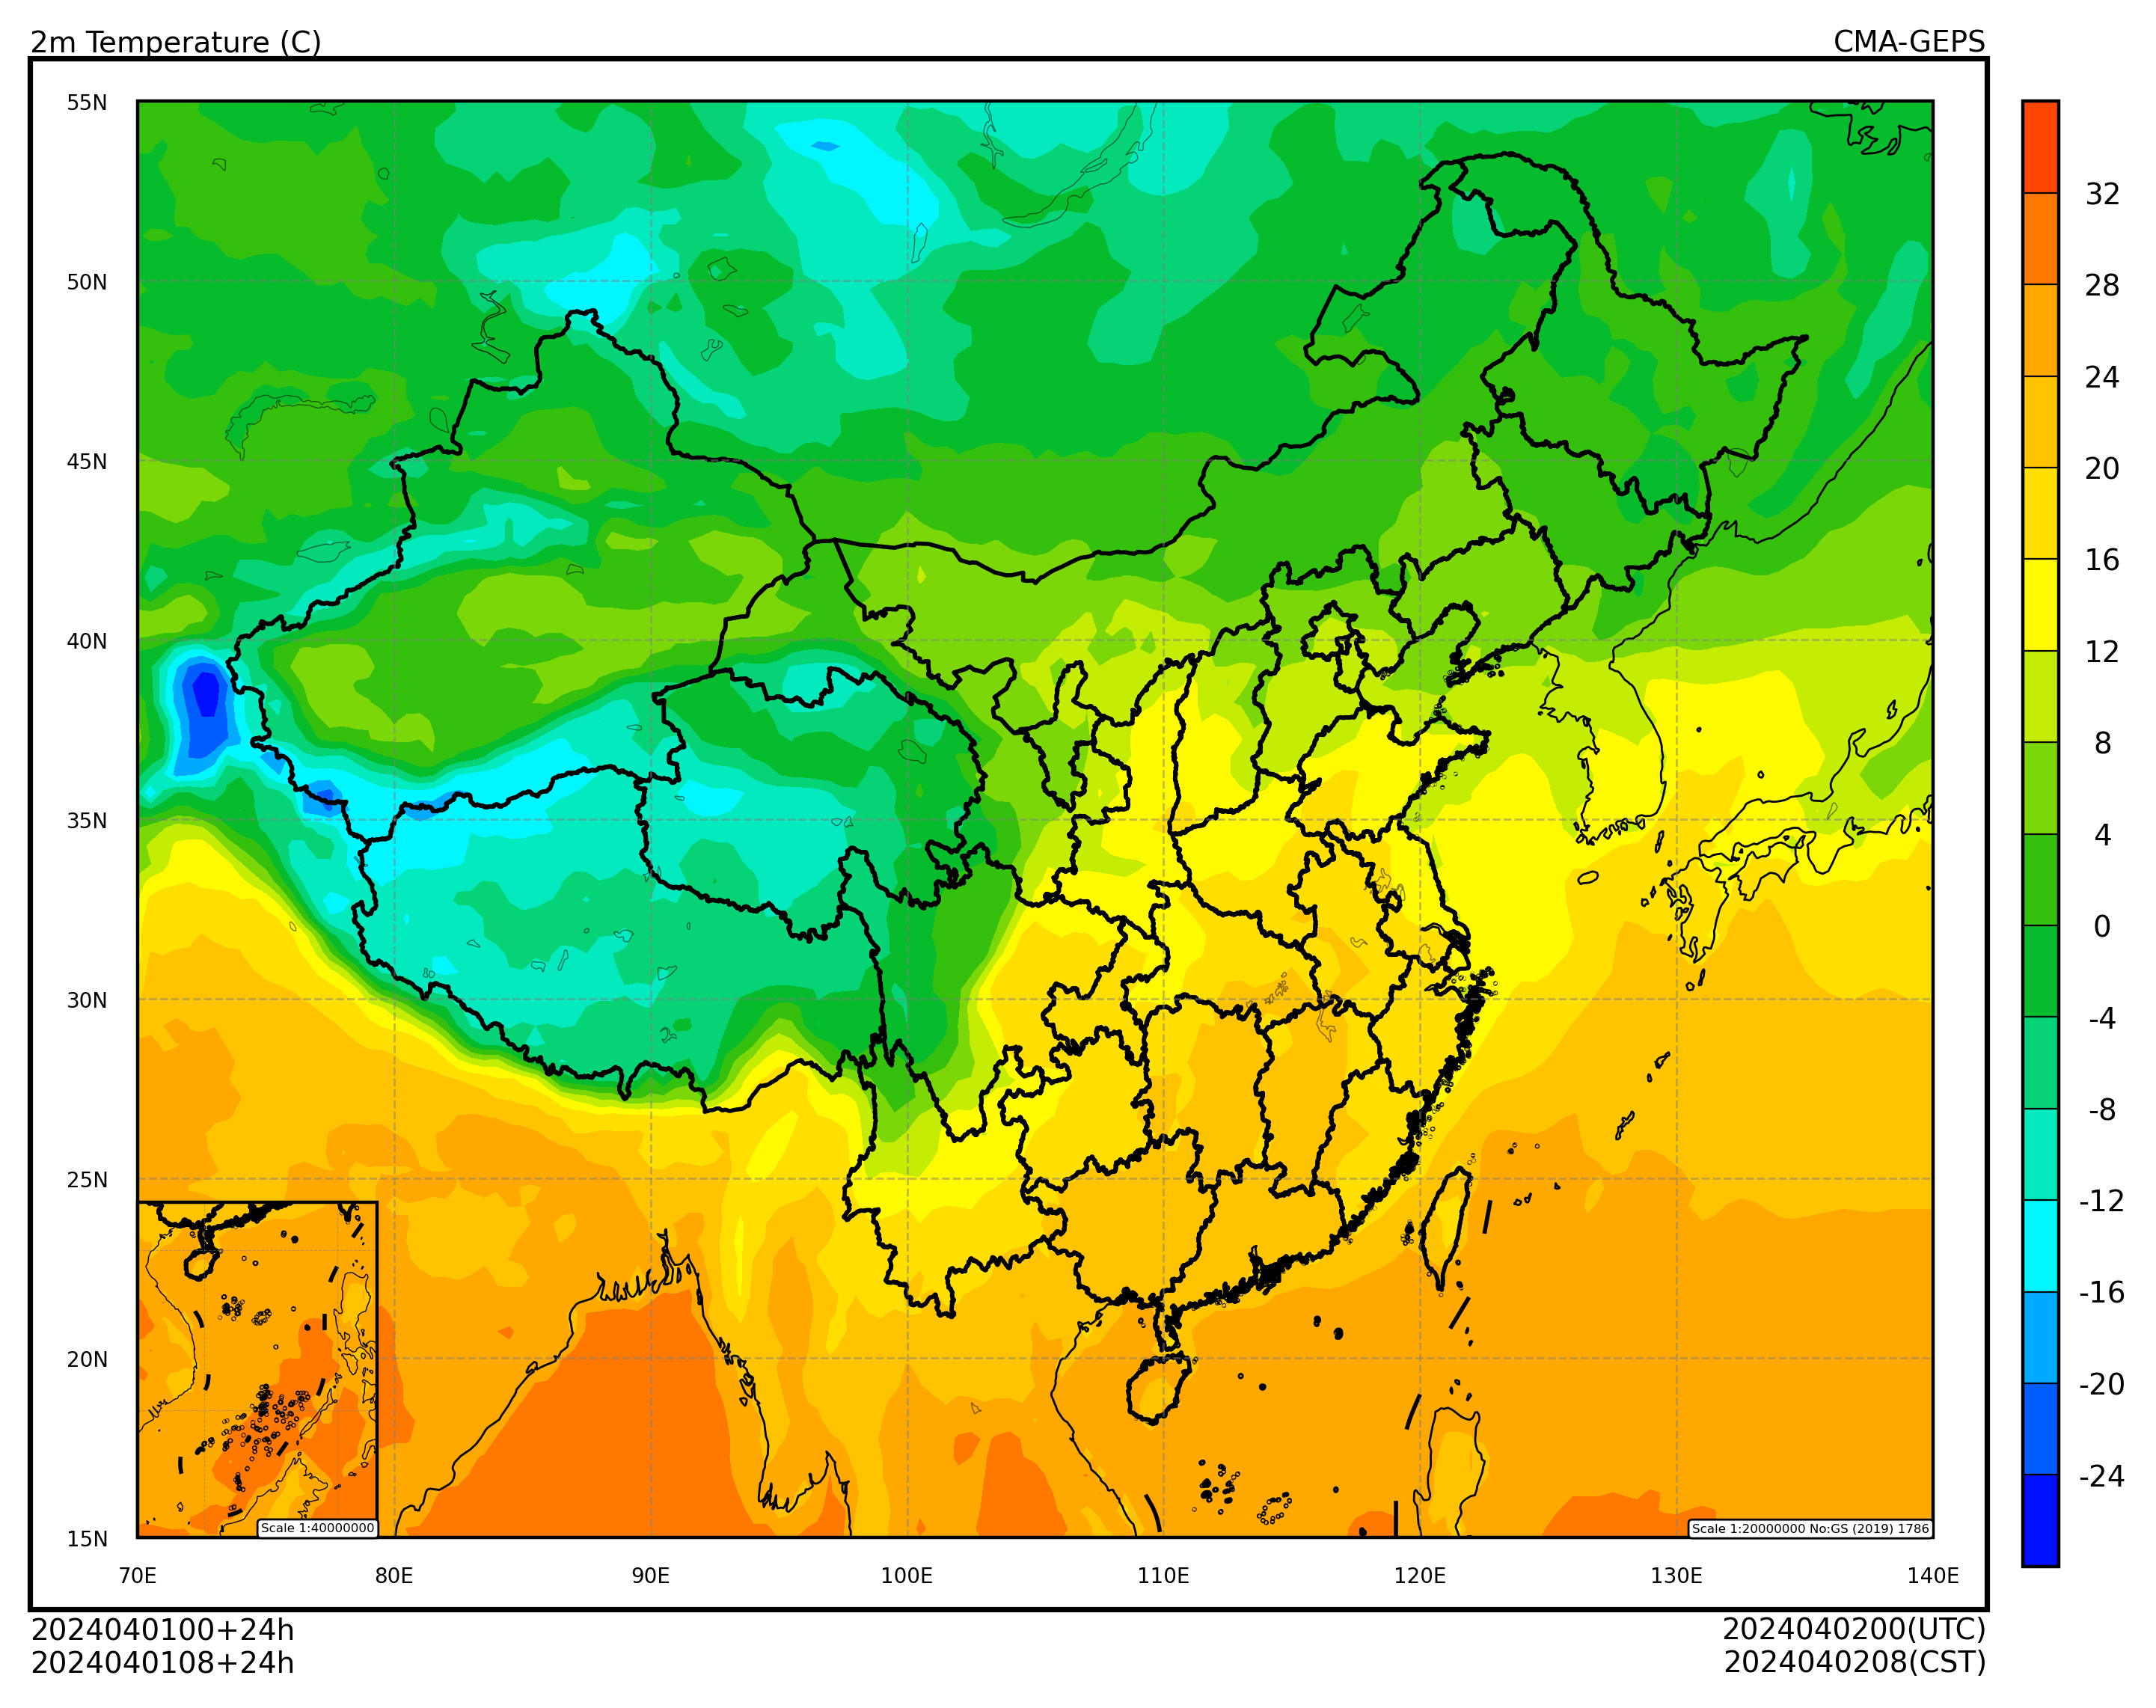

In [6]:
from cedarkit.maps.style import ContourStyle
from cedarkit.maps.chart import Panel
from cedarkit.maps.domains import EastAsiaMapDomain
from cedarkit.maps.colormap import get_ncl_colormap

t_2m_level = [-24, -20, -16, -12, -8, -4, 0, 4, 8, 12, 16, 20, 24, 28, 32]
color_index = [2, 12, 22, 32, 42, 52, 62, 72, 82, 92, 102, 112, 122, 132, 142, 152]
t_2m_color_map = get_ncl_colormap("BlAqGrYeOrReVi200", index=color_index)
t_2m_style = ContourStyle(
    colors=t_2m_color_map,
    levels=t_2m_level,
    fill=True,
)
domain = EastAsiaMapDomain()
panel = Panel(domain=domain)
panel.plot(t_2m_field, style=t_2m_style)
domain.set_title(
    panel=panel,
    graph_name="2m Temperature (C)",
    system_name=system_name,
    start_time=start_time,
    forecast_time=forecast_time,
)
domain.add_colorbar(panel=panel, style=t_2m_style)
panel.show()